## Questions Asked

In [192]:
# - Do the stats of each pokemon generation inflate? Are generations balanced against eachother?
# - Are the pokemon balanced between "type1", eg. fire/grass etc.

# EDA (Exploratory data analysis):
# - Heatmap of stats, color by generation

## Import needed tools

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#from sklearn.linear_model import LinearRegression

## Read data and inspect content

In [194]:
original_data = pd.read_csv('pokemon.csv')
original_data.head()
pd.set_option('display.max_rows', None)

original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [195]:
# Here we see that there are 800 entries, but 721 unique pokemon
original_data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [196]:
# The dataset is complete with only the optional "Type 2" field containing Nulls
original_data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Clean Data

In [197]:
# Some powerful pokemon have several entries (variations/special modes etc..)
# We don't want this to skew our data.
# Take average of stats for each pokemon with several entries (int)
cleaned_data = original_data.groupby('#').mean().astype(int).reset_index()
cleaned_data

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,318,45,49,49,65,65,45,1,0
1,2,405,60,62,63,80,80,60,1,0
2,3,575,80,91,103,111,110,80,1,0
3,4,309,39,52,43,60,50,65,1,0
4,5,405,58,64,58,80,65,80,1,0
5,6,600,78,106,89,132,95,100,1,0
6,7,314,44,48,65,50,64,43,1,0
7,8,405,59,63,80,65,80,58,1,0
8,9,580,79,93,110,110,110,78,1,0
9,10,195,45,30,35,20,20,45,1,0


## Plot

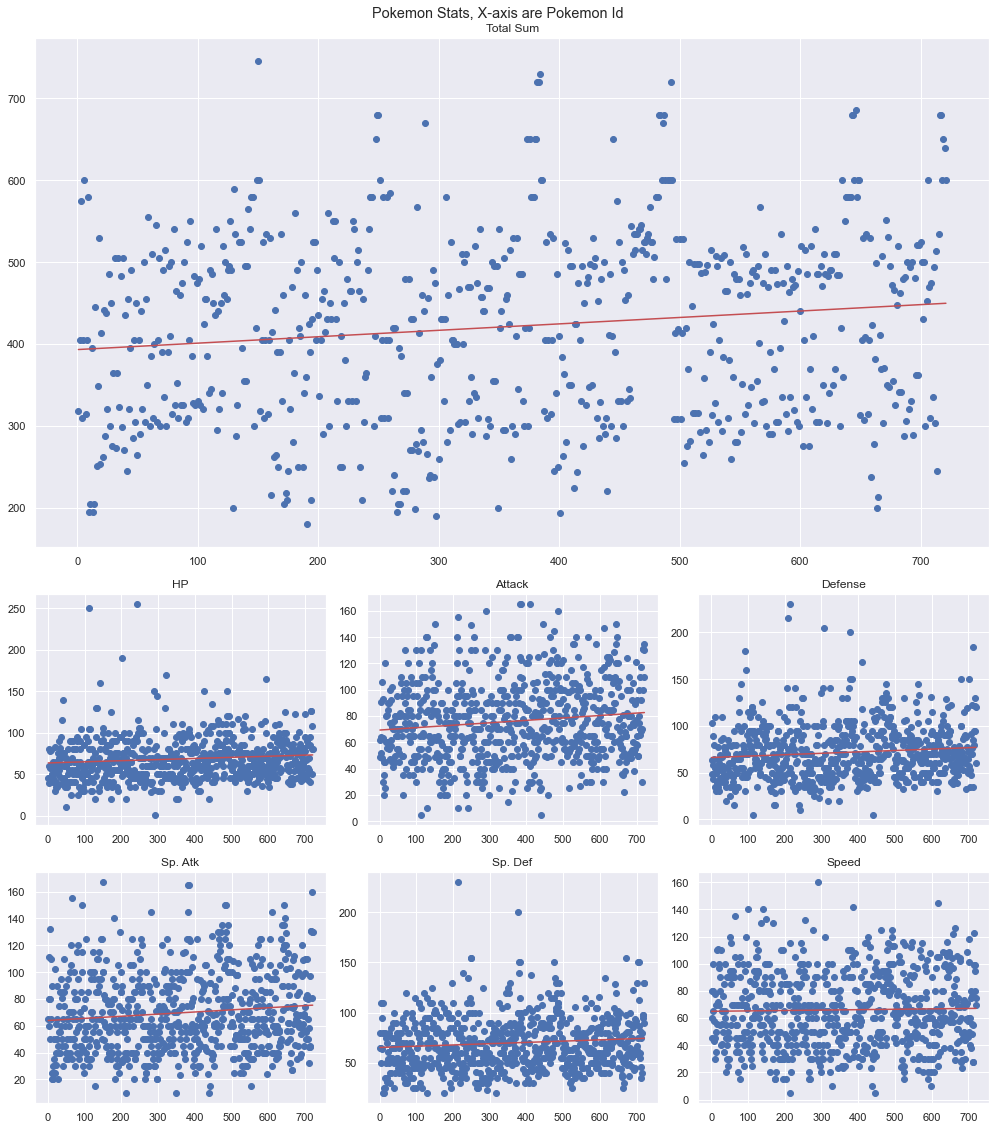

In [276]:
# plot all the numeric columns in subplots
fig = plt.figure(figsize=(14,16))
fig.suptitle('Pokemon Stats, X-axis are Pokemon Id')
ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(shape=(4, 3), loc=(2, 0))
ax3 = plt.subplot2grid(shape=(4, 3), loc=(2, 1))
ax4 = plt.subplot2grid(shape=(4, 3), loc=(2, 2))
ax5 = plt.subplot2grid(shape=(4, 3), loc=(3, 0))
ax6 = plt.subplot2grid(shape=(4, 3), loc=(3, 1))
ax7 = plt.subplot2grid(shape=(4, 3), loc=(3, 2))

# Adding linear fit to all plots to investigate inflation

def linear_fit(ax,x,y):
    b, m = np.polyfit(x, y, 1)
    polyfit = b * x + m
    ax.plot(x, polyfit,'r')

ax1.set_title('Total Sum')
ax1.scatter(cleaned_data['#'], cleaned_data['Total'])
linear_fit(ax1, cleaned_data['#'], cleaned_data['Total'])

ax2.set_title('HP')
ax2.scatter(cleaned_data['#'], cleaned_data['HP'])
linear_fit(ax2, cleaned_data['#'], cleaned_data['HP'])

ax3.set_title('Attack')
ax3.scatter(cleaned_data['#'], cleaned_data['Attack'])
linear_fit(ax3, cleaned_data['#'], cleaned_data['Attack'])

ax4.set_title('Defense')
ax4.scatter(cleaned_data['#'], cleaned_data['Defense'])
linear_fit(ax4, cleaned_data['#'], cleaned_data['Defense'])

ax5.set_title('Sp. Atk')
ax5.scatter(cleaned_data['#'], cleaned_data['Sp. Atk'])
linear_fit(ax5, cleaned_data['#'], cleaned_data['Sp. Atk'])

ax6.set_title('Sp. Def')
ax6.scatter(cleaned_data['#'], cleaned_data['Sp. Def'])
linear_fit(ax6, cleaned_data['#'], cleaned_data['Sp. Def'])

ax7.set_title('Speed')
ax7.scatter(cleaned_data['#'], cleaned_data['Speed'])
linear_fit(ax7, cleaned_data['#'], cleaned_data['Speed'])

# adjust padding 
plt.tight_layout()
 

## Calculate mean for each type1 (fire/grass etc.), plot mean by type1

In [287]:
# Calculate total mean of stats, irregardless of type1
data_means = cleaned_data.mean()
#data_means

# These are the unique "Type 1" 
unique_type1 = list(original_data["Type 1"].unique())

# Make new dataframe with type1 as index
## Learned: Don't grow dataframes, grow lists then make df.
type1_means = []
for numeric_value in list(cleaned_data.columns):
    # Calculate mean for each type1, create series
    type1_mean = original_data.groupby('Type 1', as_index=True)[numeric_value].mean()
    type1_means.append(type1_mean)

#print(type1_means)

# Make lists of lists into df
type1_means_df = pd.DataFrame(type1_means).transpose()
    
#print(type1_mean_total)
type1_means_df.round(1)



,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.5,378.9,56.9,71.0,70.7,53.9,64.8,61.7,3.2,0.0
Dark,461.4,445.7,66.8,88.4,70.2,74.6,69.5,76.2,4.0,0.1
Dragon,474.4,550.5,83.3,112.1,86.4,96.8,88.8,83.0,3.9,0.4
Electric,363.5,443.4,59.8,69.1,66.3,90.0,73.7,84.5,3.3,0.1
Fairy,449.5,413.2,74.1,61.5,65.7,78.5,84.7,48.6,4.1,0.1
Fighting,363.9,416.4,69.9,96.8,65.9,53.1,64.7,66.1,3.4,0.0
Fire,327.4,458.1,69.9,84.8,67.8,89.0,72.2,74.4,3.2,0.1
Flying,677.8,485.0,70.8,78.8,66.2,94.2,72.5,102.5,5.5,0.5
Ghost,486.5,439.6,64.4,73.8,81.2,79.3,76.5,64.3,4.2,0.1


In [289]:
# Histogram for Categorical Variable type1, x-axis: category type1 

plt.plot(type1_means_df)


NameError: name 'type1_means_df' is not defined

In [255]:
# Plot heatmap of stats
# list(cleaned_data.columns)

In [ ]:
# Pairwise plot (sns.pairplot())


## Conclusions